In [1]:
import ROOT
import os, glob, re
import numpy as np
from array import array

import CMS_lumi, tdrstyle

Welcome to JupyROOT 6.20/02


In [81]:
masses = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]#, 1.2]

hfiles = {}
for m in masses:
    #list_files[m] = '/uscms_data/d3/mba2012/h2aa/CMSSW_10_5_0/src/h2aa/maNtuples/Era04Dec2020v1/h4g2018-mA0p8GeV_file_list.txt'
    #hfiles[m] = 'Templates/systNom_nom/h4g2017-mA%sGeV_sr_blind_None_templates.root'%(str(m).replace('.','p'))
    #assert os.path.isfile(hfiles[m])
    hfiles[m] = 'root://cmseos.fnal.gov//store/user/lpchaa4g/mandrews/2017/sg-Era04Dec2020v6/bdtgtm0p96_relChgIsolt0p07_etalt1p44/nom-nom/Templates/systNom_nom/h4g2017-mA%sGeV_sr_blind_None_templates.root'%(str(m).replace('.','p'))

In [82]:
wd, ht = 440, 400

nbins = len(masses)

#ma_bins = [float(m.replace('p','.')) for m in masses]
ma_bins = [0.]+masses#+[1.2]
#print(ma_bins)
n_ma_bins = len(ma_bins)-1
ma_bins = array('d', list(ma_bins))

h, hf, c = {}, {}, {}

keys = ['mre', 'mae']
for p in keys:
    k = p+'mA'
    h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
    #h[k] = ROOT.TGraphErrors()
    c[k] = ROOT.TCanvas('c'+k, 'c'+k, wd, ht)

for im, mass in enumerate(masses):
    
    hf[mass] = ROOT.TFile.Open("%s"%hfiles[mass], "READ")

    for p in keys:
        k = p+'mA'
        kin = k+'in'
        h[kin] = hf[mass].Get(p)
        ib = h[kin].GetXaxis().FindBin(mass)
        binc = h[kin].GetBinContent(ib)
        binerr = h[kin].GetBinError(ib)

        im_out = h[k].GetXaxis().FindBin(mass)
        if p == 'mre':
            print(mass, binc*mass, ib, im_out)
        h[k].SetBinContent(im_out-1, binc)
        h[k].SetBinError(im_out-1, binerr)
        #print(im, mass, binc, binerr)
        #h[k].SetPoint(im, mass, binc)
        #h[k].SetPointError(im, 0.1 if mass <= 0.2 else 0.1, binerr)

(0.1, 0.15809276818035378, 6, 2)
(0.2, 0.14067243498149223, 10, 3)
(0.4, 0.14048498044263613, 18, 4)
(0.6, 0.1645933138492895, 26, 5)
(0.8, 0.20524619585892237, 34, 6)
(1.0, 0.2490276788759935, 42, 7)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cmremA
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cmaemA


mre
13 TeV
mae
13 TeV


Info in <TCanvas::Print>: pdf file Plots/h4g_mre.pdf has been created
Info in <TCanvas::Print>: pdf file Plots/h4g_mae.pdf has been created


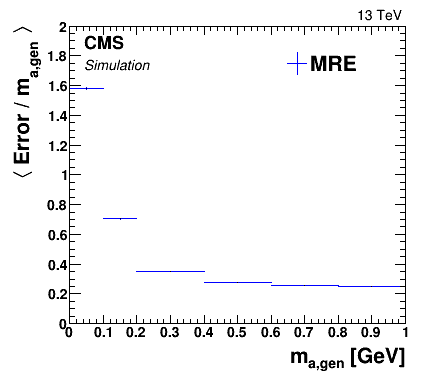

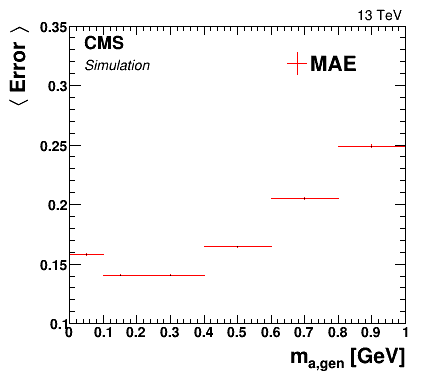

In [109]:
def set_hist(h, c, xtitle, ytitle, htitle):
    #c.SetLeftMargin(0.14)
    #c.SetRightMargin(0.07)
    #c.SetBottomMargin(0.12)
    #c.SetTopMargin(0.07)
    c.SetLeftMargin(0.16)
    c.SetRightMargin(0.07)
    c.SetBottomMargin(0.13)
    c.SetTopMargin(0.07)
    ROOT.gStyle.SetOptStat(0)

    h.GetXaxis().SetLabelSize(0.04)
    h.GetXaxis().SetLabelFont(62)
    h.GetXaxis().SetTitle(xtitle)
    h.GetXaxis().SetTitleOffset(0.9)
    h.GetXaxis().SetTitleSize(0.06)
    h.GetXaxis().SetTitleFont(62)

    h.GetYaxis().SetLabelSize(0.04)
    h.GetYaxis().SetLabelFont(62)
    h.GetYaxis().SetTitleOffset(1.2)
    h.GetYaxis().SetTitleSize(0.06)
    h.GetYaxis().SetTitleFont(62)
    h.GetYaxis().SetTitle(ytitle)

    h.SetTitleSize(0.04)
    h.SetTitleFont(62)
    h.SetTitle(htitle)
    h.SetTitleOffset(1.2)

    return h, c

print_pdf = True
#print_pdf = False

#tdrstyle.setTDRStyle()
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Simulation"
#CMS_lumi.lumi_sqrtS = "41.5 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
CMS_lumi.lumi_sqrtS = "13 TeV" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
iPos = 11
if( iPos==0 ): CMS_lumi.relPosX = 0.12
iPeriod = 0

'''
legend = ROOT.TLegend(0.56,0.71,0.92,0.88) #(x1, y1, x2, y2)
for a,algo in enumerate(algos):
    kfill = 'mremA%s'%algo
    legend.AddEntry(kfill, "MRE, %s"%algo_strs[a], "le")
legend.SetBorderSize(0)
legend.Draw("SAME")
'''
labels = ['', 0.1, 0.2, '', 0.4, '', 0.6, '',0.8, '', 1. ]
legend = {}
#c['mremA'].cd()
for p in keys:
    k = p+'mA'
    if p == 'mre':
        print(p)
        c[k].cd()
        h[k], c['mremA'] = set_hist(h[k], c['mremA'], "m_{a,gen} [GeV]", "#LT Error / m_{a,gen} #GT", "")
        h[k].SetLineColor(4)
        h[k].GetYaxis().SetRangeUser(0., 2.)
        #h[k].GetXaxis().SetRangeUser(0., 1.1)
        h[k].GetYaxis().SetTitleOffset(1.)
        h[k].GetXaxis().SetTitleOffset(1.)
        h[k].GetXaxis().SetTitleSize(0.06)
        #for i,lab in enumerate(labels):
        #        print(lab)
        #        #labsize = 0 if i%2 == 0 or i == 1 else -1
        #        #h[k].GetXaxis().ChangeLabel(i,-1,-1,-1,-1,-1,str(lab))
        h[k].Draw('E0')
        #h[k].Draw('AP')
        #legend[k] = ROOT.TLegend(0.65,0.7,0.9,0.8) #(x1, y1, x2, y2)
        legend[k] = ROOT.TLegend(0.65,0.78,0.9,0.88) #(x1, y1, x2, y2)
        legend[k].AddEntry(k, 'MRE', "lef")
        legend[k].SetBorderSize(0)
        legend[k].Draw("SAME")
    if p == 'mae':
        print(p)
        c[k].cd()
        h[k], c[k] = set_hist(h[k], c[k], "m_{a,gen} [GeV]", "#LT Error #GT", "")
        h[k].SetLineColor(2)
        h[k].GetYaxis().SetRangeUser(0.1, 0.35)
        h[k].GetYaxis().SetTitleOffset(1.2)
        h[k].GetXaxis().SetTitleOffset(1.)
        h[k].GetXaxis().SetTitleSize(0.06)
        #h[k].Draw('E0 same')
        h[k].Draw('E0')
        legend[k] = ROOT.TLegend(0.65,0.78,0.9,0.88) #(x1, y1, x2, y2)
        legend[k].AddEntry(k, 'MAE', "lef")
        legend[k].SetBorderSize(0)
        legend[k].Draw("SAME")
    #h[k].Draw('E0')
    CMS_lumi.CMS_lumi(c[k], iPeriod, iPos)
    c[k].Draw()
    if print_pdf: c[k].Print('Plots/h4g_%s.pdf'%p)
#c['mremA'].Draw()

In [80]:
gaus = np.random.normal(loc=0.0, scale=1.0, size=100)
print(gaus.shape)
mae_gaus = np.mean([abs(g) for g in gaus])
print(mae_gaus)

(100,)
0.7977158968054545
